In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\USER\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\USER\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\USER\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\USER\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\USER\Anac

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

import statsmodels.formula.api as sm

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data=pd.read_csv('LoansData.csv')

In [4]:
data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [5]:
data.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null object
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 293.0+ KB

In [7]:
pandas_profiling.ProfileReport(data)

Number of variables,15
Number of observations,2500
Total Missing (%),0.3%
Total size in memory,293.0 KiB
Average record size in memory,120.0 B
Numeric,6
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [8]:
output = pandas_profiling.ProfileReport(data)

output.to_file(outputfile='pandas_profiling.html')

In [9]:
#Data Manipulation - Changing the data types of variables

data['Interest.Rate'] = data['Interest.Rate'].apply(lambda x: float(str(x).replace('%','')))

data['Debt.To.Income.Ratio'] = data['Debt.To.Income.Ratio'].apply(lambda x: float(str(x).replace('%','')))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null float64
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 293.0+ 

In [11]:
data.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [12]:
data.columns= [col.strip().replace('.', '_') for col in data.columns]

In [13]:
data.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [14]:
s = '735-739'

In [15]:
(float(s.split('-')[0])+float(s.split('-')[1]))/2

737.0

In [16]:
data[['Fico_low','Fico_high']] = data['FICO_Range'].str.split('-', expand=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
LoanID                            2500 non-null int64
Amount_Requested                  2499 non-null float64
Amount_Funded_By_Investors        2499 non-null float64
Interest_Rate                     2498 non-null float64
Loan_Length                       2500 non-null object
Loan_Purpose                      2500 non-null object
Debt_To_Income_Ratio              2499 non-null float64
State                             2500 non-null object
Home_Ownership                    2499 non-null object
Monthly_Income                    2499 non-null float64
FICO_Range                        2498 non-null object
Open_CREDIT_Lines                 2497 non-null float64
Revolving_CREDIT_Balance          2497 non-null float64
Inquiries_in_the_Last_6_Months    2497 non-null float64
Employment_Length                 2423 non-null object
Fico_low                          2498 non-null object
Fico_h

In [18]:
data['Fico_avg'] = (data.Fico_low.astype('float')+data.Fico_high.astype('float'))/2

In [19]:
data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_low,Fico_high,Fico_avg
0,1,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,735,739,737.0
1,2,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,715,719,717.0
2,3,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,690,694,692.0
3,4,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,695,699,697.0
4,5,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,695,699,697.0


In [20]:
data['Employment_Length'] = data['Employment_Length'].apply(lambda x: str(x).replace('< ',''))
data['Employment_Length'] = data['Employment_Length'].apply(lambda x: str(x).replace('+',''))
data['Employment_Length'] = data['Employment_Length'].apply(lambda x: str(x).replace(' years',''))
data['Employment_Length'] = data['Employment_Length'].apply(lambda x: float(str(x).replace(' year','')))

In [21]:
data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_low,Fico_high,Fico_avg
0,1,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,735,739,737.0
1,2,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,715,719,717.0
2,3,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,690,694,692.0
3,4,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,695,699,697.0
4,5,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,695,699,697.0


In [22]:
data['Loan_Length'] = data['Loan_Length'].apply(lambda x: float(str(x).replace(' months','')))

In [23]:
data = data.drop(['Fico_low', 'Fico_high', 'FICO_Range', 'LoanID'], axis=1)

In [24]:
data = data.drop(['Amount_Funded_By_Investors'], axis=1)

In [25]:
data.columns

Index(['Amount_Requested', 'Interest_Rate', 'Loan_Length', 'Loan_Purpose',
       'Debt_To_Income_Ratio', 'State', 'Home_Ownership', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Fico_avg'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
Amount_Requested                  2499 non-null float64
Interest_Rate                     2498 non-null float64
Loan_Length                       2500 non-null float64
Loan_Purpose                      2500 non-null object
Debt_To_Income_Ratio              2499 non-null float64
State                             2500 non-null object
Home_Ownership                    2499 non-null object
Monthly_Income                    2499 non-null float64
Open_CREDIT_Lines                 2497 non-null float64
Revolving_CREDIT_Balance          2497 non-null float64
Inquiries_in_the_Last_6_Months    2497 non-null float64
Employment_Length                 2423 non-null float64
Fico_avg                          2498 non-null float64
dtypes: float64(10), object(3)
memory usage: 254.0+ KB


In [27]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Amount_Requested', 'Interest_Rate', 'Loan_Length', 'Debt_To_Income_Ratio', 'Monthly_Income', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Fico_avg']
['Loan_Purpose', 'State', 'Home_Ownership']


In [28]:
data_num = data[numeric_var_names]

In [29]:
data_num.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0


In [30]:
data_cat = data[cat_var_names]

In [31]:
data_cat.head()

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,SC,MORTGAGE
1,debt_consolidation,TX,MORTGAGE
2,debt_consolidation,CA,MORTGAGE
3,debt_consolidation,KS,MORTGAGE
4,credit_card,NJ,RENT


In [32]:
data_num.Fico_avg.quantile(0.01)

662.0

In [33]:
data_num.Fico_avg.max()

832.0

In [34]:
data_num['Fico_avg'] = data_num.Fico_avg.clip_upper(807)
data_num['Fico_avg'] = data_num.Fico_avg.clip_lower(662)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [36]:
data_num=data_num.apply(lambda x: outlier_capping(x))

In [37]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

In [38]:
data_num=data_num.apply(lambda x: Missing_imputation(x))

In [39]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
Amount_Requested                  2500 non-null float64
Interest_Rate                     2500 non-null float64
Loan_Length                       2500 non-null float64
Debt_To_Income_Ratio              2500 non-null float64
Monthly_Income                    2500 non-null float64
Open_CREDIT_Lines                 2500 non-null float64
Revolving_CREDIT_Balance          2500 non-null float64
Inquiries_in_the_Last_6_Months    2500 non-null float64
Employment_Length                 2500 non-null float64
Fico_avg                          2500 non-null float64
dtypes: float64(10)
memory usage: 195.4 KB


In [40]:
#Handling missings - Method2
def Cat_Missing_imputation(x):
    x = x.fillna(x.mode())
    return x

In [41]:
data_cat=data_cat.apply(lambda x: Cat_Missing_imputation(x))

In [42]:
data_cat.columns

Index(['Loan_Purpose', 'State', 'Home_Ownership'], dtype='object')

In [43]:
data_cat.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [44]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat.columns:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

In [45]:
data_cat.head()

,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
#car_sales=pd.concat(car_sales_num, car_sales_cat)
data_new = pd.concat([data_num, data_cat], axis=1)

data_new.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,0,1


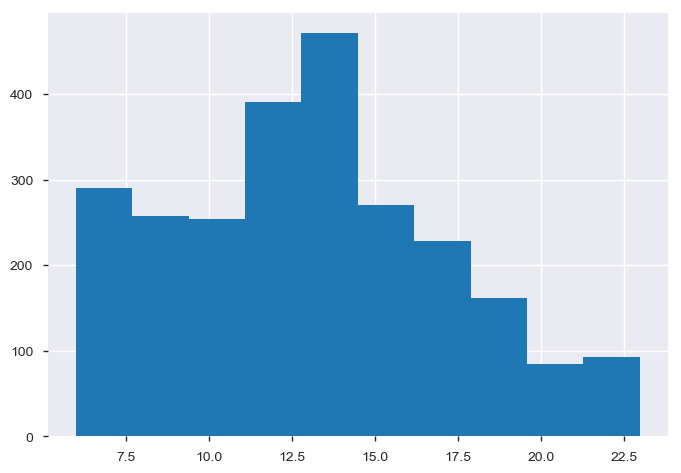

In [47]:
data_new.Interest_Rate.hist()

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


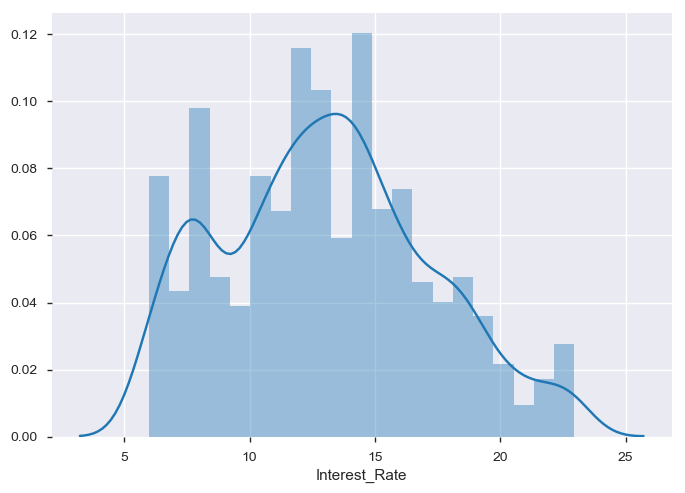

In [48]:
import seaborn as sns
sns.distplot(data_new.Interest_Rate)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


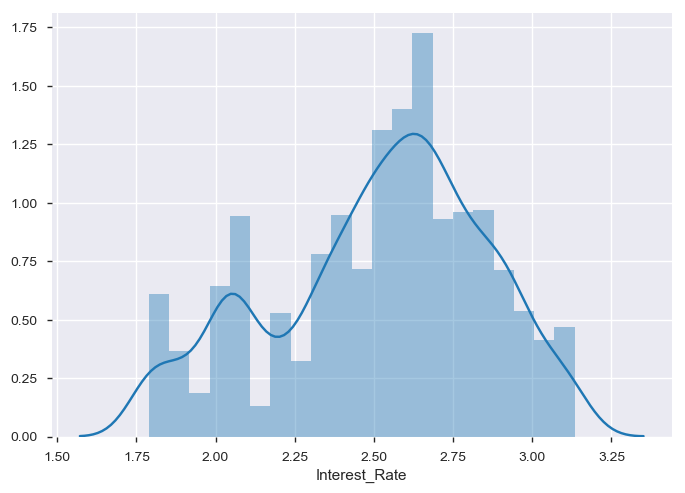

In [49]:
import seaborn as sns
sns.distplot(np.log(data_new.Interest_Rate))

In [50]:
data_new["ln_Interest_Rate"]= np.log(data_new["Interest_Rate"])

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


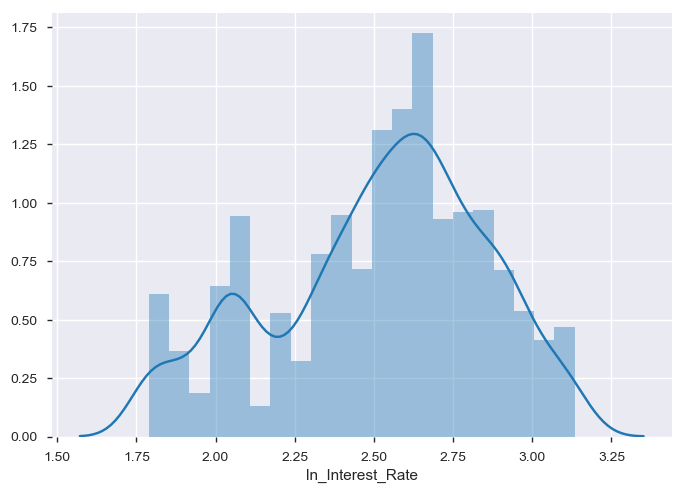

In [51]:
# Distribution of variables
import seaborn as sns
sns.distplot(data_new.ln_Interest_Rate)

In [52]:
# correlation matrix (ranges from 1 to -1)
corrm=data_new.corr()

corrm.to_csv('corrm.csv')

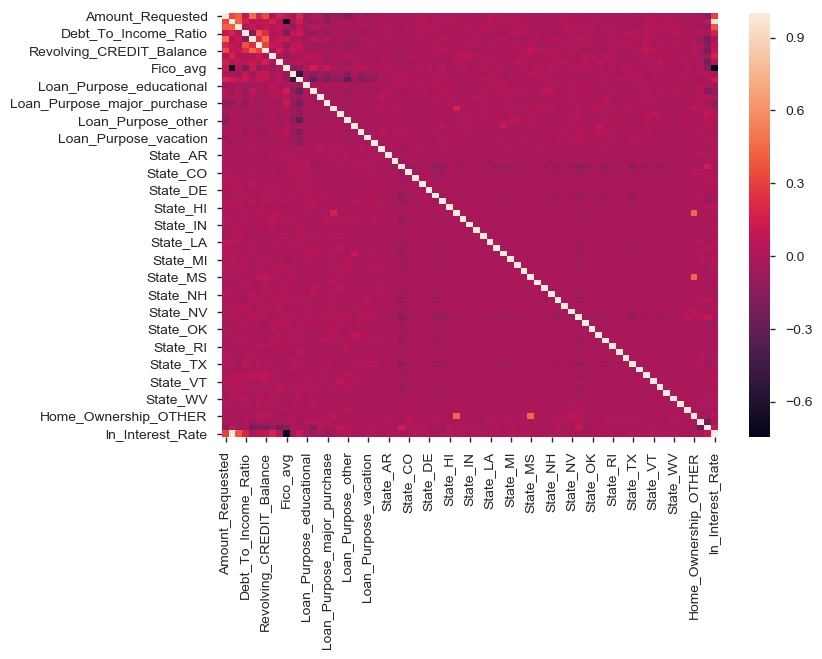

In [53]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_new.corr())

In [54]:
features = data_new[data_new.columns.difference( ['ln_Interest_Rate', 'Interest_Rate'] )]
target = data_new['ln_Interest_Rate']

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import itertools

lm = LinearRegression()

# create the RFE model and select 10 attributes
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(features, target)

In [58]:
features.columns

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'Fico_avg', 'Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_MI',
       'State_MN',

In [57]:
rfe.get_support()

array([False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False, False])

In [59]:
# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(features.columns, rfe.get_support())]

In [60]:
feature_map

[('Amount_Requested', False),
 ('Debt_To_Income_Ratio', False),
 ('Employment_Length', False),
 ('Fico_avg', False),
 ('Home_Ownership_NONE', True),
 ('Home_Ownership_OTHER', True),
 ('Home_Ownership_OWN', False),
 ('Home_Ownership_RENT', False),
 ('Inquiries_in_the_Last_6_Months', False),
 ('Loan_Length', False),
 ('Loan_Purpose_credit_card', True),
 ('Loan_Purpose_debt_consolidation', True),
 ('Loan_Purpose_educational', False),
 ('Loan_Purpose_home_improvement', False),
 ('Loan_Purpose_house', True),
 ('Loan_Purpose_major_purchase', False),
 ('Loan_Purpose_medical', False),
 ('Loan_Purpose_moving', True),
 ('Loan_Purpose_other', True),
 ('Loan_Purpose_renewable_energy', False),
 ('Loan_Purpose_small_business', True),
 ('Loan_Purpose_vacation', True),
 ('Loan_Purpose_wedding', True),
 ('Monthly_Income', False),
 ('Open_CREDIT_Lines', False),
 ('Revolving_CREDIT_Balance', False),
 ('State_AL', False),
 ('State_AR', False),
 ('State_AZ', False),
 ('State_CA', False),
 ('State_CO', Fals

In [73]:
features.columns

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'Fico_avg', 'Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_MI',
       'State_MN',

In [74]:
rfe.get_support()

array([False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False, False])

In [75]:
features.columns[rfe.get_support()]

Index(['Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_house', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_small_business', 'Loan_Purpose_vacation',
       'Loan_Purpose_wedding', 'State_DE', 'State_HI', 'State_KY', 'State_MT',
       'State_NH', 'State_OH', 'State_OR', 'State_SC', 'State_SD', 'State_VT'],
      dtype='object')

In [61]:
#Alternative of capturing the important variables
RFE_features=features.columns[rfe.get_support()]

In [62]:
features1 = features[RFE_features]

In [63]:
features1.head()

,Home_Ownership_NONE,Home_Ownership_OTHER,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_house,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,State_DE,State_HI,State_KY,State_MT,State_NH,State_OH,State_OR,State_SC,State_SD,State_VT
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [82]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [83]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [84]:
f_reg_results.sort_values(by=['F_Value'], ascending=False)

,Variable,F_Value,P_Value
3,Fico_avg,3100.724445,0.000
9,Loan_Length,438.267854,0.000
0,Amount_Requested,250.674653,0.000
1,Debt_To_Income_Ratio,82.469906,0.000
8,Inquiries_in_the_Last_6_Months,81.193740,0.000
11,Loan_Purpose_debt_consolidation,45.372662,0.000
15,Loan_Purpose_major_purchase,31.624958,0.000
13,Loan_Purpose_home_improvement,24.097597,0.000
7,Home_Ownership_RENT,18.616762,0.000
25,Revolving_CREDIT_Balance,16.004991,0.000


In [87]:
list_vars = ['Home_Ownership_NONE', 'Loan_Purpose_credit_card', 'Loan_Purpose_house', 'Loan_Purpose_small_business', 'Loan_Purpose_wedding', 'State_NH', 'Home_Ownership_OTHER', 'Loan_Purpose_debt_consolidation', 'Loan_Purpose_moving', 'Loan_Purpose_vacation', 'State_DE', 'State_OH', 'State_SD', 'State_VT', 'Amount_Requested', 'Loan_Length', 'Debt_To_Income_Ratio', 'Inquiries_in_the_Last_6_Months', 'Fico_avg', 'Loan_Purpose_home_improvement', 'Loan_Purpose_major_purchase', 'Home_Ownership_RENT', 'Revolving_CREDIT_Balance', 'Open_CREDIT_Lines', 'State_MI', 'Loan_Purpose_medical', 'State_HI', 'State_LA', 'Loan_Purpose_other', 'State_KY', 'State_MT', 'State_SC', 'State_OR']

In [88]:
list_vars

['Home_Ownership_NONE',
 'Loan_Purpose_credit_card',
 'Loan_Purpose_house',
 'Loan_Purpose_small_business',
 'Loan_Purpose_wedding',
 'State_NH',
 'Home_Ownership_OTHER',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_moving',
 'Loan_Purpose_vacation',
 'State_DE',
 'State_OH',
 'State_SD',
 'State_VT',
 'Amount_Requested',
 'Loan_Length',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Fico_avg',
 'Loan_Purpose_home_improvement',
 'Loan_Purpose_major_purchase',
 'Home_Ownership_RENT',
 'Revolving_CREDIT_Balance',
 'Open_CREDIT_Lines',
 'State_MI',
 'Loan_Purpose_medical',
 'State_HI',
 'State_LA',
 'Loan_Purpose_other',
 'State_KY',
 'State_MT',
 'State_SC',
 'State_OR']

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [90]:
all_columns = "+".join(list_vars)
my_formula = "ln_Interest_Rate~" + all_columns

print(my_formula)

ln_Interest_Rate~Home_Ownership_NONE+Loan_Purpose_credit_card+Loan_Purpose_house+Loan_Purpose_small_business+Loan_Purpose_wedding+State_NH+Home_Ownership_OTHER+Loan_Purpose_debt_consolidation+Loan_Purpose_moving+Loan_Purpose_vacation+State_DE+State_OH+State_SD+State_VT+Amount_Requested+Loan_Length+Debt_To_Income_Ratio+Inquiries_in_the_Last_6_Months+Fico_avg+Loan_Purpose_home_improvement+Loan_Purpose_major_purchase+Home_Ownership_RENT+Revolving_CREDIT_Balance+Open_CREDIT_Lines+State_MI+Loan_Purpose_medical+State_HI+State_LA+Loan_Purpose_other+State_KY+State_MT+State_SC+State_OR


In [95]:
my_formula ='ln_Interest_Rate~Home_Ownership_NONE+Loan_Purpose_credit_card+Loan_Purpose_house+Loan_Purpose_small_business+Loan_Purpose_wedding+State_NH+Home_Ownership_OTHER+Loan_Purpose_moving+Loan_Purpose_vacation+State_DE+State_OH+State_SD+State_VT+Amount_Requested+Loan_Length+Debt_To_Income_Ratio+Inquiries_in_the_Last_6_Months+Fico_avg+Loan_Purpose_home_improvement+Loan_Purpose_major_purchase+Home_Ownership_RENT+Revolving_CREDIT_Balance+Open_CREDIT_Lines+State_MI+Loan_Purpose_medical+State_HI+State_LA+Loan_Purpose_other+State_KY+State_MT+State_SC+State_OR'

In [96]:
# get y and X dataframes based on this regression
y, X = dmatrices(my_formula, data_new, return_type='dataframe')

In [97]:
variance_inflation_factor(X.values, 1)

1.0095015560353706

In [98]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,535.1,Intercept
1,1.0,Home_Ownership_NONE
2,1.1,Loan_Purpose_credit_card
3,1.0,Loan_Purpose_house
4,1.0,Loan_Purpose_small_business
5,1.0,Loan_Purpose_wedding
6,1.0,State_NH
7,1.0,Home_Ownership_OTHER
8,1.0,Loan_Purpose_moving
9,1.0,Loan_Purpose_vacation


In [99]:
train, test = train_test_split( data_new, test_size = 0.3, random_state = 1234 )

print(len(train))
print(len(test))

1750
750


In [102]:
import statsmodels.formula.api as smf

In [103]:
my_formula

'ln_Interest_Rate~Home_Ownership_NONE+Loan_Purpose_credit_card+Loan_Purpose_house+Loan_Purpose_small_business+Loan_Purpose_wedding+State_NH+Home_Ownership_OTHER+Loan_Purpose_moving+Loan_Purpose_vacation+State_DE+State_OH+State_SD+State_VT+Amount_Requested+Loan_Length+Debt_To_Income_Ratio+Inquiries_in_the_Last_6_Months+Fico_avg+Loan_Purpose_home_improvement+Loan_Purpose_major_purchase+Home_Ownership_RENT+Revolving_CREDIT_Balance+Open_CREDIT_Lines+State_MI+Loan_Purpose_medical+State_HI+State_LA+Loan_Purpose_other+State_KY+State_MT+State_SC+State_OR'

In [139]:
my_formula = 'ln_Interest_Rate~Home_Ownership_NONE+Loan_Purpose_wedding+Amount_Requested+Loan_Length+Inquiries_in_the_Last_6_Months+Fico_avg+Loan_Purpose_home_improvement+Revolving_CREDIT_Balance+Open_CREDIT_Lines+Loan_Purpose_other'

In [140]:
model = smf.ols(my_formula, data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     664.1
Date:                Sat, 12 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:55:26   Log-Likelihood:                 730.56
No. Observations:                1750   AIC:                            -1441.
Df Residuals:                    1740   BIC:                            -1386.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [143]:
train.Interest_Rate

42      19.13
108     14.09
1577     7.90
237     13.67
1436    12.61
156     11.48
181      7.90
590      6.99
1748     6.62
1386    15.31
758     19.05
1801    11.86
1094    14.65
1527    17.27
402      6.03
769     13.11
950     13.11
993     16.29
321     11.99
999      8.63
1441     6.03
1986    13.11
1559    13.11
2087    13.67
580     15.31
1982    10.74
289     10.36
1433    11.11
2323    16.29
479     17.49
        ...  
2042     6.03
371     17.77
1985     7.49
1299    16.29
1282    19.05
3        9.99
2384     7.29
745     17.27
1219    14.65
1530     6.54
1826    11.71
2341     8.59
1100    17.27
1787    10.74
1586    17.77
246     10.75
2431    21.00
969     12.69
1904    12.12
2168    11.71
2490    11.71
1398     7.90
1182    14.33
30      21.00
1257    13.99
279     13.99
2041    11.49
664      7.90
1318    10.59
723     12.69
Name: Interest_Rate, Length: 1750, dtype: float64

In [144]:
mape = np.mean(np.abs(train.Interest_Rate - np.exp(model.predict(train)))/train.Interest_Rate)

In [145]:
mape

0.12028014892347902

In [146]:
mape_test = np.mean(np.abs(test.Interest_Rate - np.exp(model.predict(test)))/test.Interest_Rate)

In [147]:
mape_test

0.12394391550695605

In [150]:
train['pred'] = pd.DataFrame(np.exp(model.predict(train)))

train.head()

test['pred'] = pd.DataFrame(np.exp(model.predict(test)))
test.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate,pred
903,12500.0,9.32,36.0,11.71,4166.67,7.0,1052.0,0.0,2.0,782.0,...,0,0,0,0,0,0,0,0,2.232163,6.638229
674,2500.0,15.95,36.0,24.07,1500.00,10.0,2684.0,3.0,1.0,667.0,...,0,0,0,0,0,0,0,0,2.769459,15.030686
1624,21700.0,15.31,36.0,13.93,5147.17,6.0,8795.0,2.0,5.0,697.0,...,0,0,0,0,0,0,0,0,2.728506,15.098254
1214,21000.0,14.27,60.0,11.27,5333.33,8.0,19431.0,0.0,8.0,712.0,...,0,0,0,0,0,0,0,0,2.658159,15.781171
2164,4400.0,5.99,36.0,17.93,4000.00,6.0,9945.0,1.0,5.0,767.0,...,0,0,0,0,0,0,1,0,1.790091,7.118782


In [151]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [152]:
#Train Data
MAPE_train = np.mean(np.abs(train.Interest_Rate - train.pred)/train.Interest_Rate )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.Interest_Rate , train.pred)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Interest_Rate , train.pred)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(test.Interest_Rate - test.pred)/test.Interest_Rate )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Interest_Rate , test.pred)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Interest_Rate , test.pred)
print(Corr_test)

0.12028014892347902
3.7294025731866163
(0.8857283413206791, 0.0)
0.12394391550695605
3.704902120829719
(0.8856354548633355, 2.1857945156657693e-251)


In [153]:
#COnclusion: Model is getting validated

In [154]:
#Decile analysis

In [164]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)

train.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate,pred,Deciles
42,5500.0,19.13,36.0,3.58,12000.00,3.0,0.0,1.0,8.0,662.0,...,0,0,0,0,0,0,1,2.951258,15.855970,8
108,10000.0,14.09,36.0,10.59,2916.67,9.0,10390.0,3.0,1.0,692.0,...,0,0,0,0,0,0,1,2.645465,13.728340,6
1577,8000.0,7.90,36.0,8.91,3166.67,4.0,680.0,0.0,6.0,757.0,...,0,0,0,0,0,0,1,2.066863,7.909649,0
237,12375.0,13.67,36.0,22.42,2083.33,8.0,12226.0,0.0,3.0,682.0,...,0,0,0,0,0,0,0,2.615204,14.053101,6
1436,3200.0,12.61,36.0,16.72,6476.00,14.0,80837.0,4.0,10.0,667.0,...,0,0,0,0,0,0,0,2.534490,14.527696,6


In [165]:
avg_actual = train[['Deciles','Interest_Rate']].groupby(train.Deciles).mean().sort_index(ascending=False)['Interest_Rate']
avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

In [166]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

In [167]:
Decile_analysis_train

,Interest_Rate,pred
Deciles,,
9,19.877534,20.212371
8,16.929029,16.486580
7,15.753714,15.066859
6,14.692857,14.150256
5,13.641314,13.309061
4,12.825886,12.451804
3,11.229371,11.423278
2,9.933200,10.353491
1,8.752731,9.094254


In [168]:
test['Deciles']=pd.qcut(test['pred'],10, labels=False)

avg_actual_test = test[['Deciles','Interest_Rate']].groupby(test.Deciles).mean().sort_index(ascending=False)['Interest_Rate']
avg_pred_test = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
Decile_analysis_test

,Interest_Rate,pred
Deciles,,
9,19.708921,20.234253
8,16.714267,16.132271
7,15.569733,14.961097
6,14.535600,14.140790
5,13.511867,13.297435
4,12.444667,12.421425
3,11.497067,11.384719
2,9.837333,10.300162
1,8.401920,9.009746
